<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Looking-at-the-data" data-toc-modified-id="Looking-at-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Looking at the data</a></span></li><li><span><a href="#Task-1" data-toc-modified-id="Task-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 1</a></span><ul class="toc-item"><li><span><a href="#Task-1.1-(1-point)" data-toc-modified-id="Task-1.1-(1-point)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Task 1.1 (1 point)</a></span></li><li><span><a href="#Question-1.2-(1-point)" data-toc-modified-id="Question-1.2-(1-point)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Question 1.2 (1 point)</a></span></li><li><span><a href="#Question-1.3-(1-point)" data-toc-modified-id="Question-1.3-(1-point)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Question 1.3 (1 point)</a></span></li><li><span><a href="#Try-it-from-your-own-input" data-toc-modified-id="Try-it-from-your-own-input-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Try it from your own input</a></span></li><li><span><a href="#Question-1.4-(1-point)" data-toc-modified-id="Question-1.4-(1-point)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Question 1.4 (1 point)</a></span></li></ul></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task 2</a></span></li><li><span><a href="#SVD-refesher" data-toc-modified-id="SVD-refesher-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SVD refesher</a></span><ul class="toc-item"><li><span><a href="#Task-2.1-(1-point)" data-toc-modified-id="Task-2.1-(1-point)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Task 2.1 (1 point)</a></span></li><li><span><a href="#Question-2.2-(1-point)" data-toc-modified-id="Question-2.2-(1-point)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Question 2.2 (1 point)</a></span></li><li><span><a href="#Task-2.3-(1-point)" data-toc-modified-id="Task-2.3-(1-point)-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Task 2.3 (1 point)</a></span></li><li><span><a href="#Task-2.4-(1.5-points)" data-toc-modified-id="Task-2.4-(1.5-points)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Task 2.4 (1.5 points)</a></span></li><li><span><a href="#Task-2.5-(1.5-points)" data-toc-modified-id="Task-2.5-(1.5-points)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Task 2.5 (1.5 points)</a></span></li></ul></li><li><span><a href="#Additional-task-(2-extra-points)" data-toc-modified-id="Additional-task-(2-extra-points)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Additional task (2 extra points)</a></span></li></ul></div>

# Welcome to the final project!
In this notebook you will be asked to use singular value decomposition and SVM to classify images. We will be working with the MNIST numbers dataset, where training data consist of pictures of digits, and the target value is the digit itself.

First, we import the necessary libraries.

In [1]:
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Now, we read both training and test dataset as arrays.

In [2]:
data = np.load('mnist.npz')
X_test_total, X_train_total, y_train_total, y_test_total = data['x_test'], data['x_train'], data['y_train'], data['y_test']

Let's select two digits that we will be learning to separate, for example 3 and 8.

In [3]:
num1, num2 = 3, 8

Let us form the lists of indices i such that the target of i-th object of our training data is either num1 or num2. Do the same for the test dataset.

In [4]:
train_indx = [y == num1 or y == num2 for y in y_train_total]
test_indx = [y == num1 or y == num2 for y in y_test_total] # your code here 

Form new arrays consisting of the data with the target values num1 and num2 only.

In [5]:
X_train, y_train = X_train_total[train_indx], y_train_total[train_indx]
X_test, y_test = X_test_total[test_indx], y_test_total[test_indx] # your code here

## Looking at the data

Let us check the sizes of the datasets and the shape of one image.

In [6]:
print('Data shapes: ')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

Data shapes: 
X_train:  (11982, 28, 28)
y_train:  (11982,)
X_test:  (1984, 28, 28)
y_test:  (1984,)


In [7]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

n_train, n_test

(11982, 1984)

In [8]:
print('Shape of one item: ')
print(X_train[0].shape)

Shape of one item: 
(28, 28)


Train data are images of digits.

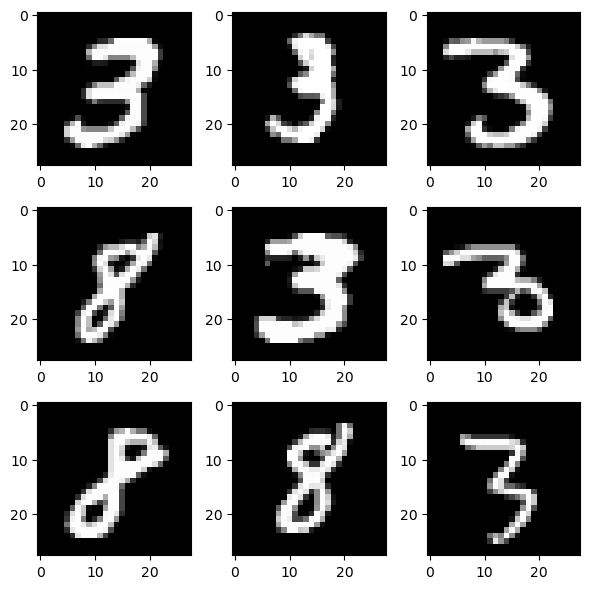

In [9]:
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.tight_layout()
plt.show()

Target values are numbers.

In [10]:
y_train[:9]

array([3, 3, 3, 8, 3, 3, 8, 8, 3], dtype=uint8)

## Task 1

### Task 1.1 (1 point)
Now our data is 3-dimensional of shape (number of images, n_pixels, n_pixels). To work with PCA and SVM we need to flatten the images by turning each of them into an array of shape (n_pixels x n_pixels, ).

In [11]:
def flatten_image(X):
    return X.reshape(-1) # your code here

In [12]:
X_train_flat = np.array([flatten_image(img) for img in X_train]) # np.array([flatten_image(img) for img in X_train])
X_test_flat = np.array([flatten_image(img) for img in X_test]) # your code here
X_train_flat.shape, X_test_flat.shape

((11982, 784), (1984, 784))

PCA works best when the data is scaled (think, why?), so let's scale our data. We will use [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for it. Note, that scaling replaces a collection of vectors x by the collection of the vectors $x' = (x-M)/D$, where $M$ is the mean vector of
the sample, $D$ is the vector of standard deviations of all components of the vectors, and the division is component-wise. So, the scaled collection has the same size as the original one, and each column has 0 mean and unit standard deviation.


In [13]:
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

### Question 1.2 (1 point)

Please write your answer on the impact of scaling below. Why does scaling help PCA? If your idea need some computer experiments for confirmation (say, training and accuracy calculations  with non-scaled data), please provide the code here as well.

***Your answer here.***

Feature scaling through standardization, that is also called Z-score normalization, ensures that all features have a mean of 0 and a standard deviation of 1. If one feature has a larger scale than another, it can dominate the variance and influence the principal components disproportionately. By scaling them to a specified range (min-max scaling), we ensure that each feature contributes proportionally to the variance explained by the principal components.

The code below demonstrates why scaling does help PCA:

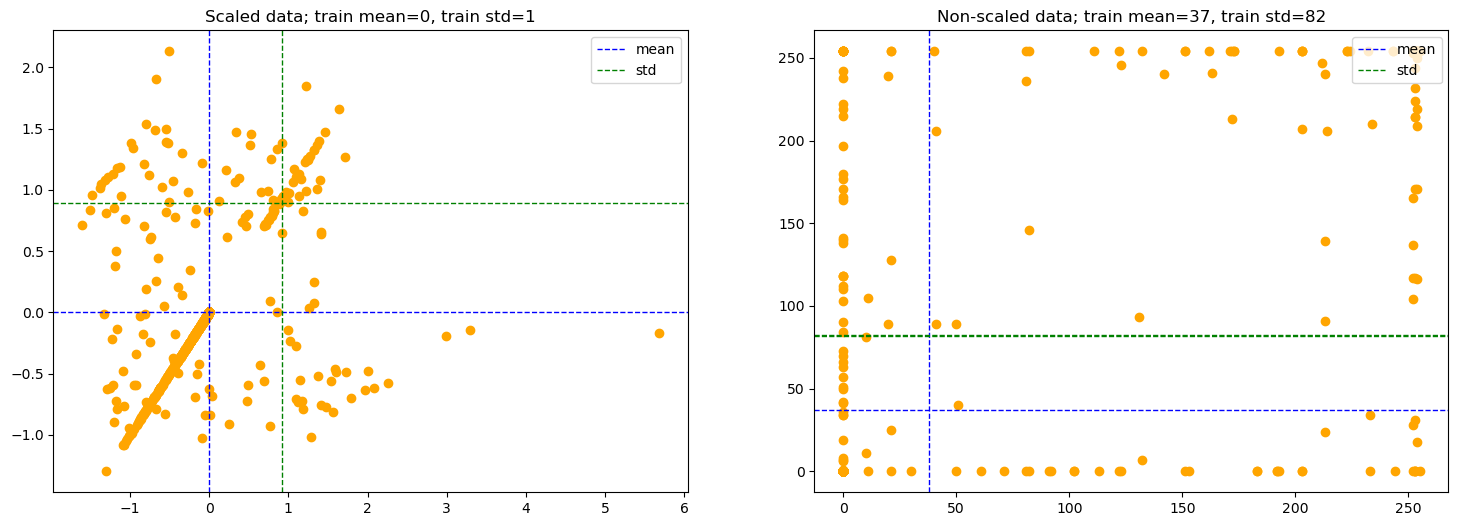

In [14]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test_flat[:][1], X_train_flat[:][1], color='orange')

plt.axvline(np.mean(X_test_flat), color='b', linestyle='dashed', linewidth=1, label='mean')
plt.axhline(np.mean(X_train_flat), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.std(X_test_flat), color='g', linestyle='dashed', linewidth=1, label='std')
plt.axhline(np.std(X_train_flat), color='g', linestyle='dashed', linewidth=1)

plt.title(f'Scaled data; train mean={round(np.mean(X_train_flat))}, train std={round(np.std(X_train_flat))}')
plt.legend(loc='upper right')

ns_test, ns_train = data['x_test'][test_indx], data['x_train'][train_indx]

plt.subplot(1, 2, 2)
plt.scatter(ns_test[:][1], ns_train[:][1], color='orange')

plt.axvline(np.mean(ns_test), color='b', linestyle='dashed', linewidth=1, label='mean')
plt.axhline(np.mean(ns_train), color='b', linestyle='dashed', linewidth=1)
plt.axhline(np.std(ns_test), color='g', linestyle='dashed', linewidth=1, label='std')
plt.axhline(np.std(ns_train), color='g', linestyle='dashed', linewidth=1)

plt.legend(loc='upper right')
plt.title(f'Non-scaled data; train mean={round(np.mean(ns_train))}, train std={round(np.std(ns_train))}')

plt.show()

In [15]:
import warnings
warnings.filterwarnings("ignore")

def run_model(X_train, X_test, y_train, y_test):
    model = LinearSVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

ns_train_flat = np.array([flatten_image(img) for img in ns_train])
ns_test_flat = np.array([flatten_image(img) for img in ns_test])

print(f'Accuracy on non-scaled test data: {run_model(ns_train_flat, ns_test_flat, y_train, y_test)}')
print(f'Accuracy on standardized test data: {run_model(X_train_flat, X_test_flat, y_train, y_test)}')

Accuracy on non-scaled test data: 0.9566532258064516
Accuracy on standardized test data: 0.9611895161290323


Now, we call PCA and reduce the number of components for each vector.

In [16]:
pca = PCA(n_components=128, random_state=42)
X_train_flat = pca.fit_transform(X_train_flat)

In [17]:
X_test_flat = pca.transform(X_test_flat)

In [18]:
X_test_flat.shape, X_test_flat.shape

((1984, 128), (1984, 128))

### Question 1.3 (1 point)

What is the ratio of the memory used for the data `compressed' by PCA and the one used for the original data?

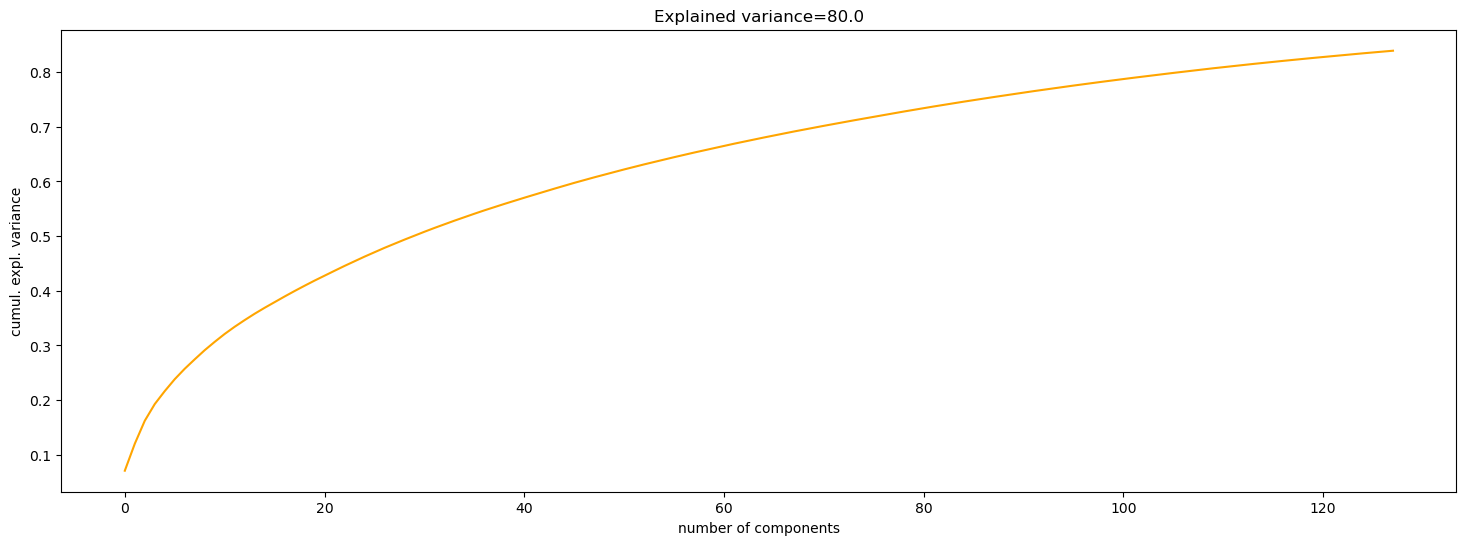

Ratio of the PCA-compressed data memory vs the original data memory: 26.08%


In [19]:
# assess variability 
plt.figure(figsize=(18, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='orange')
plt.xlabel('number of components')
plt.ylabel('cumul. expl. variance')
plt.title(f'Explained variance={np.sum(np.cumsum(pca.explained_variance_ratio_)).round(0)}')
plt.show()

print(f'Ratio of the PCA-compressed data memory vs the original data memory: {(X_train_flat.nbytes / X_train_total.nbytes):.2%}')

Now, we use SVM with linear kernel to separate the two classes.

In [20]:
%%time
clf = LinearSVC(random_state=42)
clf.fit(X_train_flat, y_train)

CPU times: user 4.17 s, sys: 96.9 ms, total: 4.26 s
Wall time: 5.09 s


LinearSVC(random_state=42)

Now, let us make the predictions and calculate the accuracy, that is, the ratio of the true predictions to the test sample size.  Use [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) as the quality metric here.

$$accuracy(y\_true, y\_pred) = \frac{1}{n}\sum_{i=1}^n [y\_true_i=y\_pred_i],$$ where $[a=b]=1$, if $a=b$, and $0$ otherwise.

In [21]:
y_pred = clf.predict(X_test_flat) # your code here
acc = np.sum((y_test == y_pred) / y_test.shape[0]) # your code here
print("Test accuracy: ", acc)

Test accuracy:  0.9667338709677415


### Try it from your own input
Try to make your own dataset. You can either make a photo image of an ink-written digit or draw a digit using a graphical editor of your computer or smartphone. Note that the input picture has to be a white number on a black background, like the numbers in the MNIST dataset. It can be either in png or jpeg format. Replace the sample striwith your file name.

In [22]:
from scipy import misc
from PIL import Image

In [23]:
image = Image.open('/Users/badmoonrising/Desktop/my_digit/8.png').convert('L')
new_image = image.resize((28, 28))
custom = np.array(new_image)
custom.shape

(28, 28)

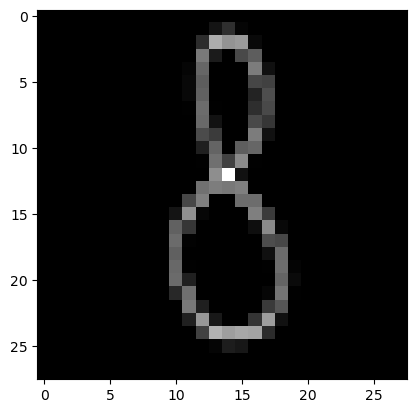

In [24]:
plt.imshow(custom, cmap='gray')
plt.show()

Re-shape your image and make a prediction.

In [25]:
custom = flatten_image(custom).reshape(1, -1)
custom = scaler.transform(custom)
custom = pca.transform(custom)
custom.shape

(1, 128)

In [26]:
clf.predict(custom)

array([3], dtype=uint8)

### Question 1.4 (1 point)

Repeat the above digit recognition procedure with other 5 to 10 hand-written images. Do your experiments confirm the above accuracy estimate? How do you think, why they confirm (or not confirm) it?

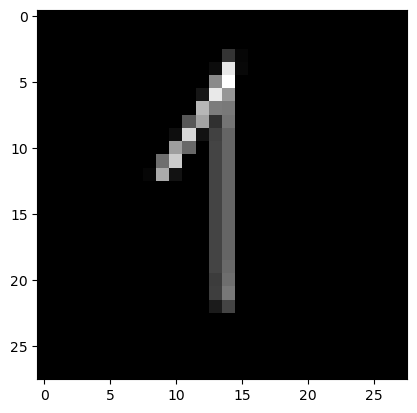

Digit 1 was not recognized as 3


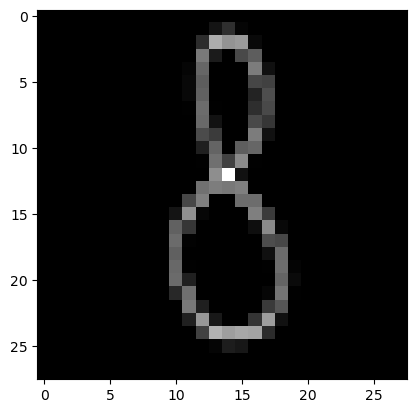

Digit 8 was not recognized as 3


In [27]:
for i in (1,8):
    image = Image.open(f'/Users/badmoonrising/Desktop/my_digit/{i}.png').convert('L')
    new_image = image.resize((28, 28))
    custom = np.array(new_image)
    plt.imshow(custom, cmap='gray')
    plt.show()
    custom = flatten_image(custom).reshape(1,-1)
    custom = scaler.transform(custom)
    custom = pca.transform(custom)

    if i == clf.predict(custom)[0]:
        print(f"Digit {i} was recognized as {clf.predict(custom)[0]}")

    else:
        print(f"Digit {i} was not recognized as {clf.predict(custom)[0]}")

***Your answer here.***

The experiment confirms the accuracy.

## Task 2
Now let's try another approach explained [here](https://technodocbox.com/3D_Graphics/77509408-Handwritten-digit-classification-and-reconstruction-of-marred-images-using-singular-value-decomposition.html) in Section 3. For each digit, we create a new matrix $A$ whose columns are flattened images of this digit. The first several (say, 10) columns of the matrix $U$ from SVD decomposition of $A$ represent a collection of "typical" images of this digit. Given an unrecognized flatten image, among average typical flattened images we find the closets one. Its target value is considered as a prediction for the target of the unrecognized image.

## SVD refesher
As you may recall from the lectures, SVD of a matrix $A$ is a decomposition:
$A = U \Sigma V^T,$ where $U$ and $V$ are orthogonal matrices. In this method we will be utilizing some properties of SVD.

In [28]:
def getSingularVectorsLeft(matrix, number=10): # let's take first 10 numbers
    u,s,v = svd(matrix)
    return u[:,:number] # return first _number_ columns of U from SVD of _matrix_

In [29]:
def getSingularImage(X_train, y_train, number):
    # find images whose target is _number_
    im_num = [y == number for y in y_train]
    select_images = X_train[im_num]
    A = np.zeros((select_images[0].shape[0] ** 2, 1))
    for image in select_images:
    # iteratively append new column to form matrix A
        A = np.hstack((A, np.reshape(image, (len(image)**2, 1))))
    A = A[:, 1:]
    # left_basis = # get left singular vectors
    left_basis = getSingularVectorsLeft(A)
    return left_basis

Try it first on "0".

In [1]:
left_basis = getSingularImage(X_train_total, y_train_total, 0)
assert left_basis.shape, (784, 10)

NameError: name 'getSingularImage' is not defined

### Task 2.1 (1 point)
Plot first 9 singular images of the digit 0 taking columns of matrix U and reshaping them back into images 28x28. Use `numpy.reshape`.

In [ ]:
#singular images
plt.figure(figsize=(6,6))
a, b = 3, 3
for i in range(a*b):
    plt.subplot(b, a, i+1)
    img = left_basis[:,i].reshape(28,28) # ith element of left basis reshaped back to 28x28
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

### Question 2.2 (1 point)

Reflect on properties of the columns of $U_k$. What properties do you think are contained in each of them? Draw more singular images to help you make conclusions.

***Your answer here.***

Now let's move on and obtain singular images for all numbers. The matrices $U_k$ from  [the article](https://technodocbox.com/3D_Graphics/77509408-Handwritten-digit-classification-and-reconstruction-of-marred-images-using-singular-value-decomposition.html) are represented as `number_basis_matrices[k]`.
This might take a while to finish, feel free to add debug print in your function to know the progress.

In [ ]:
number_basis_matrices = [getSingularImage(X_train_total, y_train_total, digit) for digit in range(10)] # use getSingularImage funciton to get matrices for all numbers

### Task 2.3 (1 point)
Plot the first singular image of each digit, similarly to the previous task.

In [ ]:
plt.figure(figsize=(6,6))
a, b = 3, 4
for i in range(10):
    plt.subplot(b, a, i+1)
    img = number_basis_matrices[i][:,0].reshape(28,28) # first column of U_k in number_basis_matrices[i] reshaped into 28x28 image
    plt.imshow(img, cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
dim = number_basis_matrices[0].shape[0]
print(f"Dim size: {dim}")

### Task 2.4 (1.5 points)

Here we calculate the new projection matrix for each $U_k$ to apply later in testing:
$pr = (I - U_k \cdot U_{k}^{T})$. Use `numpy.matmul` for matrix multiplication and `numpy.identity` to create an identity matrix. Please note that this operation might also take some time to finish.

In [ ]:
numeric_values = [np.identity(number_basis_matrices[i].shape[0]) - np.matmul(number_basis_matrices[i], np.transpose(number_basis_matrices[i])) for i in range(10)] # create an array of pr for each number

### Task 2.5 (1.5 points)
Implement function utilizing `numeric_values` matrices to predict labels for unknown images. Use `numpy.norm` and enumerate to iterate over numeric values.

In [ ]:
def find_closest(test_value, numeric_values):
    stacked_test = test_value.reshape(-1, 1)
    # find closest U_k to test_value using norm and return the target digit
    
    min_distance = np.inf
    target = None
    
    for i, m in enumerate(numeric_values):
        distance = np.linalg.norm(np.matmul(m, stacked_test))
        if distance < min_distance:
            min_distance = distance
            target = i

    return target

In [ ]:
y_pred = np.array([find_closest(test_value, numeric_values) for test_value in X_test]) # find array of predictions for test values and calculate accuracy in the cell below

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2%}")

## Additional task (2 extra points)
In the first task we trained Linear SVM to separate 3s and 8s. Here you can implement multiclass classification for _all_ numbers in `MNIST`. Use the same function LinearSVC for “one-vs-the-rest” multi-class strategy, see [the documentation](https://scikit-learn.org/stable/modules/svm.html#classification).  Follow the same steps from task 1: scaling, feature selection, training and testing. Is the accuracy of this method greater then the one calculated above?

**Note:** Use `random_state=42` for `PCA` and `LinearSVC`. Training `LinearSVC` on all the data might take a while, that's normal.

In [ ]:
# flatten
X_train_tot_flat = np.array([flatten_image(img) for img in X_train_total])
X_test_tot_flat = np.array([flatten_image(img) for img in X_test_total])
# Scandart Scaler
X_train_tot_flat = scaler.fit_transform(X_train_tot_flat)
X_test_tot_flat = scaler.transform(X_test_tot_flat)
# PCA
pca = PCA(n_components=128, random_state=42)
X_train_tot_flat = pca.fit_transform(X_train_tot_flat)
X_test_tot_flat = pca.transform(X_test_tot_flat)
# LinearSVC
clf = LinearSVC(random_state=42)
clf.fit(X_train_tot_flat, y_train_total)
y_pred = clf.predict(X_test_tot_flat)

In [ ]:
acc = np.sum((y_test_total == y_pred) / y_test_total.shape[0])
print(f"Accuracy: {acc:.2%}") # calculate accuracy